In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv("titanic_train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


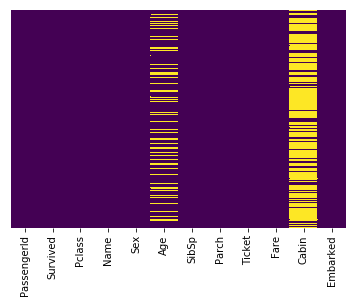

In [6]:
 sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
sns.set_style('whitegrid')

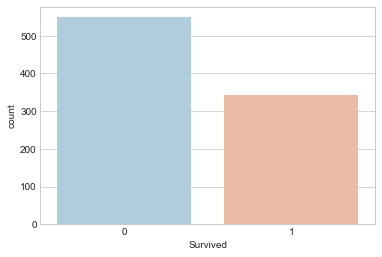

In [10]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')

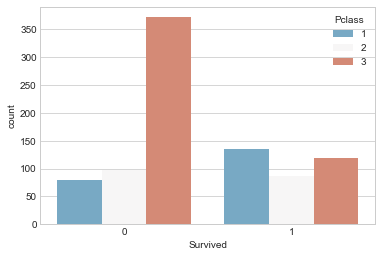

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


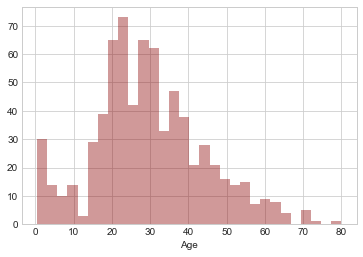

In [12]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

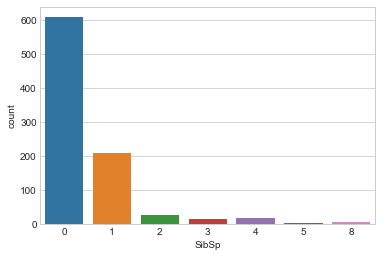

In [14]:
#people with no family members
sns.countplot(x='SibSp',data=train)

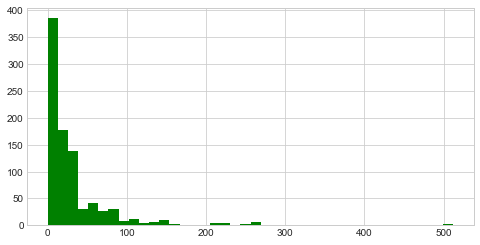

In [16]:
#the more are working on the ship
#why need to come with there family members
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

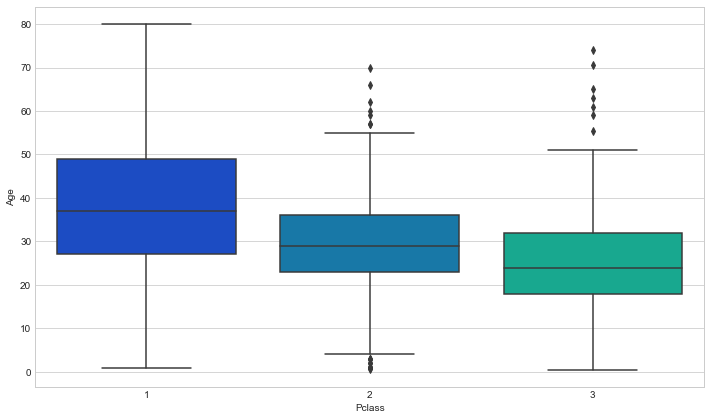

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [25]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [26]:
 train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

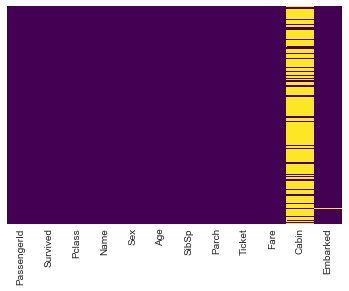

In [27]:
 sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')



In [28]:
train.drop('Cabin',axis=1,inplace=True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
train.dropna(inplace=True)

In [31]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [32]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [35]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [36]:
train=pd.concat([train,sex,embark],axis=1)

In [37]:
sex

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [38]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,24.0,0,0,8.4583,1,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0


In [39]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [40]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [47]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
from sklearn.metrics import classification_report

In [55]:
 predictions = logmodel.predict(X_test)

In [56]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



In [5]:
#### clustring


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from sklearn.datasets import make_blobs

In [12]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8,random_state=101)

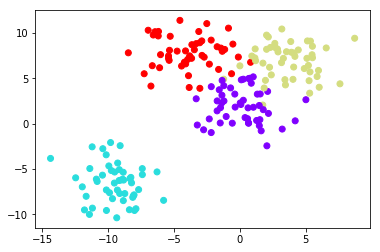

In [13]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [21]:
from sklearn.cluster import KMeans

In [22]:
 kmeans = KMeans(n_clusters=4)

In [23]:
kmeans.fit(data[0])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
kmeans.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [25]:
kmeans.labels_

array([2, 3, 0, 3, 3, 1, 3, 0, 3, 0, 2, 0, 3, 3, 2, 0, 3, 0, 1, 2, 1, 0,
       0, 1, 2, 1, 1, 0, 3, 3, 2, 1, 3, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       0, 3, 2, 0, 1, 0, 0, 2, 3, 0, 1, 2, 0, 0, 2, 3, 1, 3, 1, 2, 3, 0,
       1, 3, 3, 1, 3, 0, 1, 0, 1, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 3, 2, 1, 3, 0, 1, 0, 0, 3, 0, 1, 3, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 3, 2, 0, 1, 2, 2, 2,
       0, 1, 1, 2, 3, 2, 3, 0, 1, 3, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 0, 3,
       0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 2, 3, 0, 2,
       3, 3, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 3, 2, 1, 0, 3, 3,
       1, 0])

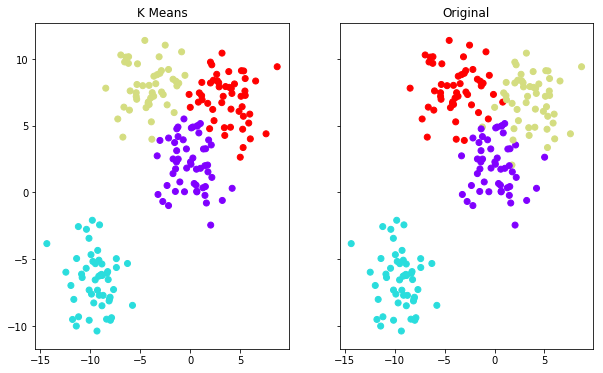

In [28]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [29]:
college=pd.read_csv("College_Data")

In [30]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [31]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


In [32]:
college.describe()


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


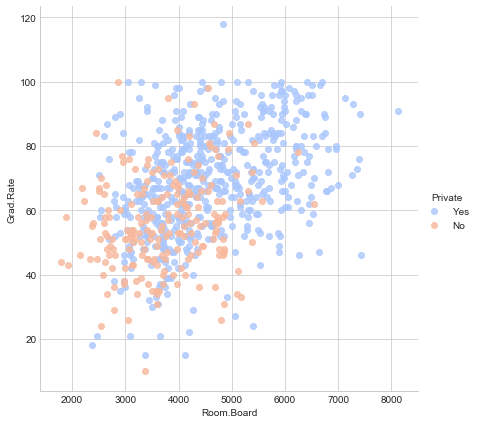

In [37]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=college,hue='Private',palette='coolwarm',size=6,aspect=1,fit_reg=False)


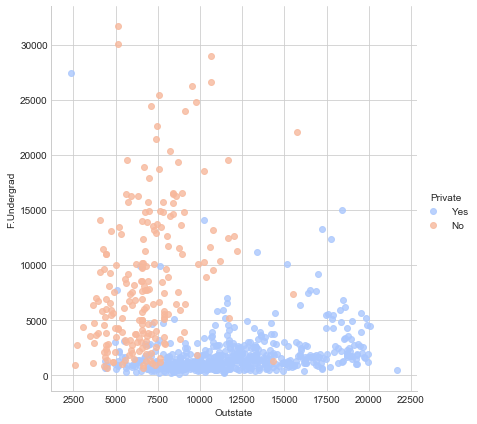

In [39]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=college,hue='Private',palette='coolwarm',size=6,aspect=1,fit_reg=False)


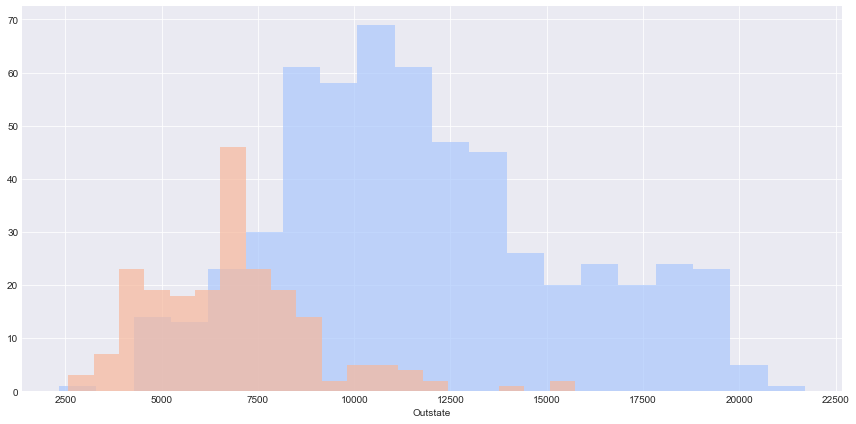

In [42]:
 sns.set_style('darkgrid')
g=sns.FacetGrid(college,hue='Private',palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

In [43]:
from sklearn.cluster import KMeans


In [49]:
college[college['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [50]:
college['Grad.Rate']['Cazenovia College']=100

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
college[college['Grad.Rate']>100]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


kmeans=KMeans(n_clusters=2)

In [52]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
kmeans.fit(college.drop('Private',axis=1))

ValueError: could not convert string to float: 'York College of Pennsylvania'

In [57]:
college.replace(-118, np.nan)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [61]:
college=pd.read_csv("College_Data - Copy")

In [62]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [63]:
kmeans.fit(college.drop('Private',axis=1))

ValueError: could not convert string to float: 'York College of Pennsylvania'

In [64]:
pr=pd.read_csv("KNN_Project_Data")

In [65]:
pr

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
5,1587.993461,667.420121,2072.048544,364.624958,905.011385,2229.178514,880.442566,568.698408,645.719217,2156.949990,1
6,1497.293624,822.435853,908.059366,671.797517,1280.270442,1910.066313,1052.812386,713.757499,703.951632,1088.493788,0
7,1172.820769,1166.958461,455.656588,445.572745,1109.894585,1045.551452,1301.821786,264.940137,945.023932,2307.922229,0
8,839.494647,1089.747059,653.699894,659.334590,1529.725972,1521.320489,1401.676227,433.025043,1289.063583,1690.149835,0
9,1028.689140,202.089774,1030.841860,429.109102,943.104815,1978.506855,653.178512,753.655291,1336.375960,1057.864848,1


In [66]:
pr.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [67]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [68]:
pr.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [70]:
cls=pd.read_csv("Classified Data")

In [71]:
cls

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


In [72]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler=StandardScaler()

In [76]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
scaler.fit(cls.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
scaled_features=scaler.transform(cls.drop('TARGET CLASS',axis=1))

In [83]:
cls_feat=pd.DataFrame(scaled_features,columns=cls.columns[:-1])
cls_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
df_fead=pd.DataFrame(scaled_features,columns=cls.columns[:-1])
df_fead.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [109]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,cls['TARGET CLASS'],test_size=0.30)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn=KNeighborsClassifier(n_neighbors=1)

In [112]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [115]:
pred=knn.predict(X_test)

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print(confusion_matrix(y_test,pred))

[[132  18]
 [ 16 134]]


In [121]:
error_rate=[]

In [125]:
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

AttributeError: Unknown property market

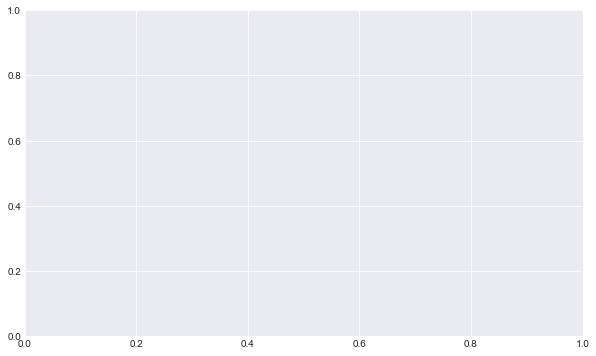

In [126]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',market='o',marketfacecolor='red',marketsize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [128]:
knn=KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[131  19]
 [  8 142]]


             precision    recall  f1-score   support

          0       0.94      0.87      0.91       150
          1       0.88      0.95      0.91       150

avg / total       0.91      0.91      0.91       300

